# Lab 8 - Option Strategies

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

## Exercise 1
Implement a function to return the payoff of a European / American option at time $t = T$. For this exercise, we will ignore the premium of the option (the price you pay / receive for the option).

In [72]:
def optionPayoff(K, S, option_type, side):
# """
#     K: strike price
#     S: price of the underlying at time t=T
#     option_type: 'call', 'put'
#     side: 'long', 'short'

#     return: payoff

# """

    # Your code goes here
    if option_type == 'call':
        if side == 'long':
            payoff = S - K
        elif side == 'short':
            payoff = K - S
    elif option_type == 'put':
        if side == 'long':
            payoff = K - S
        elif side == 'short':
            payoff = S - K
    else:
        raise ValueError('Invalid option type: {}'.format(option_type))

    return payoff

## Exercise 2
Using function optionPayoff() in Exercise 1, plot the payoff as a function of $S_T$ for the following cases:
* (a) Long call
* (b) Short call
* (c) Long put
* (d) Short put

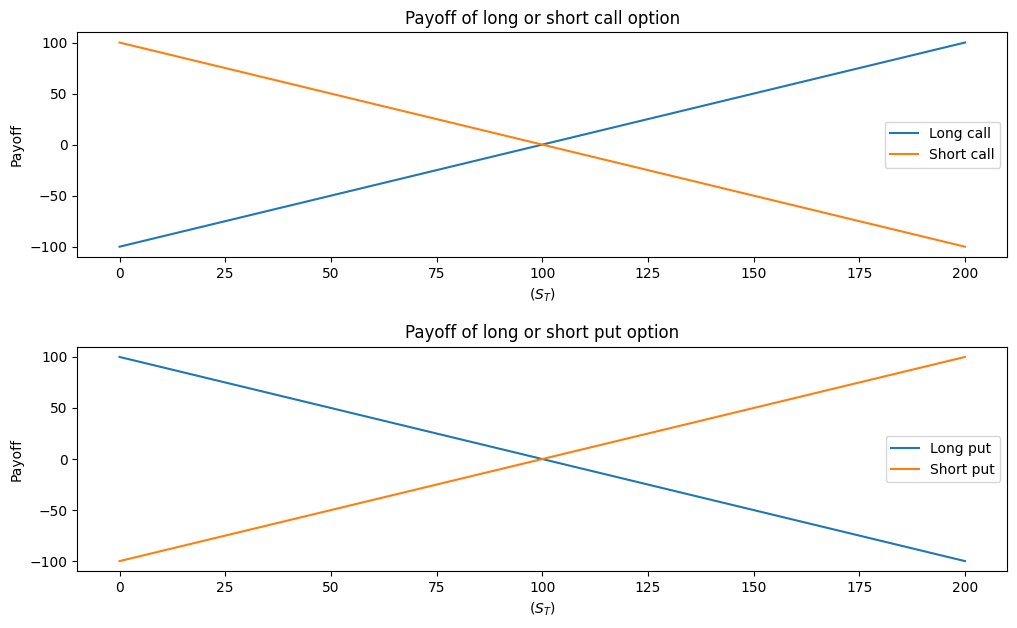

In [83]:
# Your code goes here
K = 100
S_range = np.linspace(0, 200, 1000)
long_call_payoff = optionPayoff(K, S_range, 'call', 'long')
short_call_payoff = optionPayoff(K, S_range, 'call', 'short')
long_put_payoff = optionPayoff(K, S_range, 'put', 'long')
short_put_payoff = optionPayoff(K, S_range, 'put', 'short')

fig, ax = plt.subplots(2, 1, figsize=(12, 7))
# -----------------------------------------------
# Long - Short call
ax[0].plot(S_range, long_call_payoff, label='Long call')
ax[0].plot(S_range, short_call_payoff, label='Short call')
ax[0].set_xlabel('($S_T$)')
ax[0].set_ylabel('Payoff')
ax[0].set_title('Payoff of long or short call option')
ax[0].legend(['Long call', 'Short call'], loc = 'center right')

# ------------------------------------------------
# Long - Short put
ax[1].plot(S_range, long_put_payoff, label='Long put')
ax[1].plot(S_range, short_put_payoff, label='Short put')
ax[1].set_xlabel('($S_T$)')
ax[1].set_ylabel('Payoff')
ax[1].set_title('Payoff of long or short put option')
ax[1].legend(['Long put', 'Short put'], loc = 'center right')

plt.subplots_adjust(hspace=0.4)
plt.show()

# Exercise 3

Write Python code to plot the payoff of a covered call as a function of $S_T$. You can use the function optionPayoff() in Exercise 1.

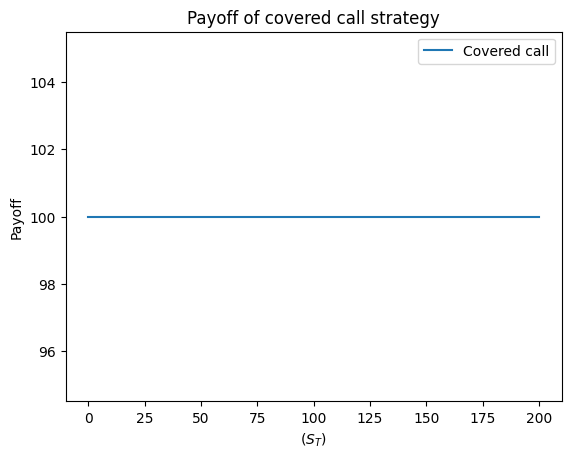

In [94]:
# Your code goes here
K = 100
S_range = np.linspace(0, 200, 1000)
covered_call_payoff = S_range - optionPayoff(K, S_range, 'call', 'long')

plt.plot(S_range, covered_call_payoff, label='Covered call')
plt.xlabel('($S_T$)')
plt.ylabel('Payoff')
plt.title('Payoff of covered call strategy')
plt.legend()
plt.show()

# Exercise 4

Implement a function to calculate the payoff of a bull spread as a function of $K_1, K_2, S$. You can use the function optionPayoff() in Exercise 1.

In [99]:
def bullSpreadPayoff(K1, K2, S_T):
   
    """
    K1: strike price of the longed call
    K2: strike price of the shorted call
    S: price of the underlying at time t=T


    return: payoff

    """
    
    # Your code goes here

    payoff = optionPayoff(K1, S_T, 'call', 'long') + optionPayoff(K2, S_T, 'call', 'short')
    
    
    return payoff

## Exercise 5
Using function bullSpreadPayoff() in Exercise 4, plot the payoff as a function of $S_T$ with $K_1=40, K_2=50$

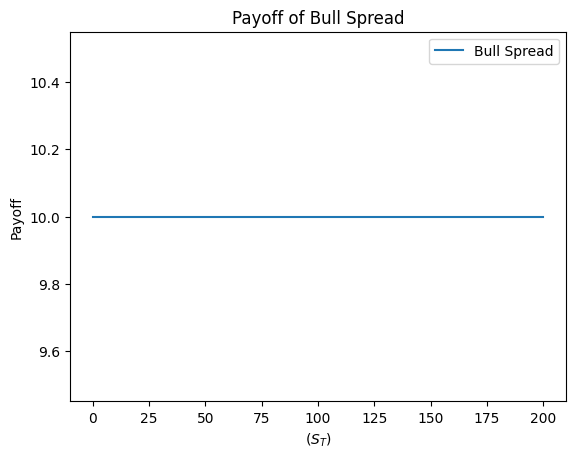

In [100]:
# Your code goes here
K1, K2 = 40, 50
S_range = np.linspace(0, 200, 1000)

plt.plot(S_range, bullSpreadPayoff(K1, K2, S_range), label='Bull Spread')
plt.xlabel('($S_T$)')
plt.ylabel('Payoff')
plt.title('Payoff of Bull Spread')
plt.legend()
plt.show()

# Exercise 6

Implement a function to calculate the payoff of a bear spread as a function of $K_1, K_2, S$. You can use the function optionPayoff() in Exercise 1.

In [101]:
def bearSpreadPayoff(K1, K2, S):

    """
    K1: strike price of the shorted put
    K2: strike price of the longed put
    S: price of the underlying at time t=T


    return: payoff
    """
    
    # Your code goes here

    payoff = optionPayoff(K1, S, 'put', 'short') + optionPayoff(K2, S, 'put', 'short')
    
    
    return payoff